### Ameya Ghatpande on 10-28-2017 for Adobe Data assignment

#### This project will proceed in following sub parts

1. Data preparation and exploration phase (Data cleaning, renaming few columns, basic Graphs for understanding data better)
2. Which Factors really impact the student churn (Machine learning - DecisionTreeclassifier)

In [1]:
# <aghatpande> on 28-Oct-2017
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [58]:
# <aghatpande> on 28-Oct-2017 
# Import the standard libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# <aghatpande> on 28-Oct-2017 
# Read all the .CSV files
coursesDF = pd.read_csv("C:\\Ameya-Important\\OULAD\\courses.csv")
assessmentsDF = pd.read_csv("C:\\Ameya-Important\\OULAD\\assessments.csv")
vleDF = pd.read_csv("C:\\Ameya-Important\\OULAD\\vle.csv")
studentInfoDF = pd.read_csv("C:\\Ameya-Important\\OULAD\\studentInfo.csv")
studentRegistrationDF = pd.read_csv("C:\\Ameya-Important\\OULAD\\studentRegistration.csv")
studentAssessmentDF = pd.read_csv("C:\\Ameya-Important\\OULAD\\studentAssessment.csv")
studentVleDF = pd.read_csv("C:\\Ameya-Important\\OULAD\\studentVle.csv")

#### Check if any of the columns have "NULL" in all the DataFrames

In [4]:
pd.isnull(coursesDF).sum() > 0
#pd.isnull(assessmentsDF).sum() > 0
#pd.isnull(vleDF).sum() > 0
#pd.isnull(studentInfoDF).sum() > 0
#pd.isnull(studentRegistrationDF).sum() > 0
#pd.isnull(studentAssessmentDF).sum() > 0
#pd.isnull(studentVleDF).sum() > 0

code_module                   False
code_presentation             False
module_presentation_length    False
dtype: bool

In [5]:
coursesDF.columns

Index([u'code_module', u'code_presentation', u'module_presentation_length'], dtype='object')

In [6]:
# <aghatpande> on 28-Oct-2017
# Check the unique Learning modules present in the VLE
print("Length of the coursesDF is", coursesDF.shape)
print("Number of unique learning modules", coursesDF.code_module.unique())
#coursesDF

('Length of the coursesDF is', (22, 3))
('Number of unique learning modules', array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object))


In [8]:
# <aghatpande> on 01-Nov-2017
# Write custom functions to extract the "Year" and "Term" portions from "code_presentation" column. 
# This will be useful for groupby "Year" and groupby "Term" later in the code
def getYear(x):
    y= x[:-1]
    return y

def getTerm(x):
    y = x[-1:]
    return y
    
# <aghatpande> on 01-Nov-2017
# Create two new columns in studentRegistrationDF
studentRegistrationDF["Year"] = studentRegistrationDF["code_presentation"].apply(lambda x: getYear(x))
studentRegistrationDF["Term"] = studentRegistrationDF["code_presentation"].apply(lambda x: getTerm(x))

#### Lets find the Overall Course figures

In [9]:
# <aghatpande> on 01-Nov-2017
# Overall course registrations and withdrawal rate
print ("Total number of course registrations is ", len(studentRegistrationDF))
unregisteredCoursesDF = studentRegistrationDF[studentRegistrationDF.date_unregistration != "?"]
completedCoursesDF = studentRegistrationDF[studentRegistrationDF.date_unregistration == "?"]
print ("Total number of course withdrawals is ", len(unregisteredCoursesDF))
print ("Total number of courses completed is ", len(completedCoursesDF))
print("Overall course withdrawal rate is", ((len(unregisteredCoursesDF)+0.0) / len(studentRegistrationDF)) *100)

('Total number of course registrations is ', 32593)
('Total number of course withdrawals is ', 10072)
('Total number of courses completed is ', 22521)
('Overall course withdrawal rate is', 30.902340993464854)


#### Lets find course wise Registration and Withdrawal rate

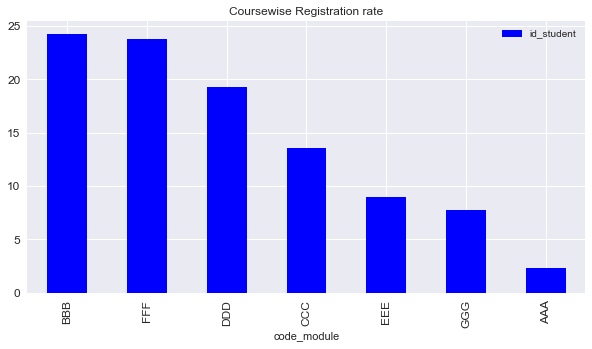

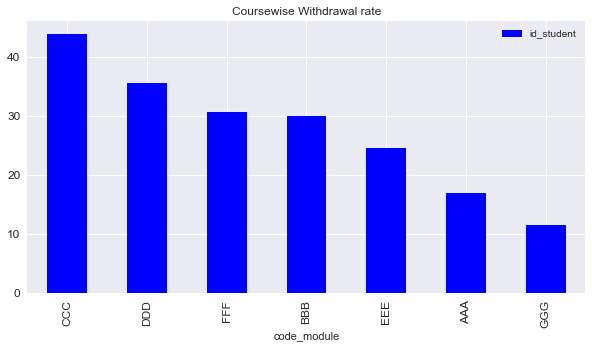

In [10]:
# <aghatpande> on 01-Nov-2017
# Check the enrollment in each course
groupbyStudentRegistrationPerCourseDF = studentRegistrationDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbystudentRegistrationPerCourseDF
registrationRatePerCourseDF = (groupbyStudentRegistrationPerCourseDF / len(studentRegistrationDF)) *100
registrationRatePerCourseDF.plot(kind='bar', title = "Coursewise Registration rate",figsize=(10,5), color="b", fontsize=12 )
#registrationRatePerCourseDF

# Check the withdrawals in each course
groupbyStudentWithdrawalPerCourseDF = unregisteredCoursesDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyunregisteredCoursesDF
#Take the ratio to find the withdrawal rate
withdrawalRatePerCourseDF = ((groupbyStudentWithdrawalPerCourseDF / groupbyStudentRegistrationPerCourseDF)*100).sort_values("id_student", ascending= False)
#withdrawalRatePerCourseDF
withdrawalRatePerCourseDF.plot(kind='bar', title = "Coursewise Withdrawal rate",figsize=(10,5), color="b", fontsize=12 )

#### Lets find the Year wise numbers for Registration rate and Withdrawal rate

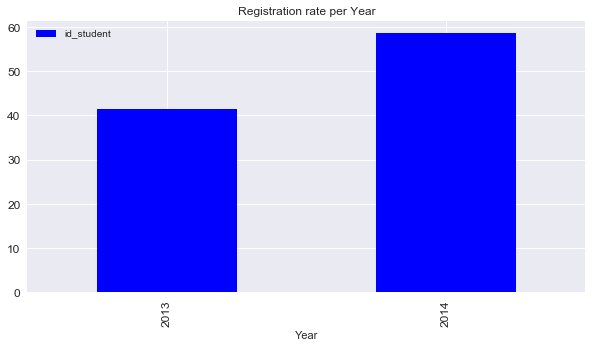

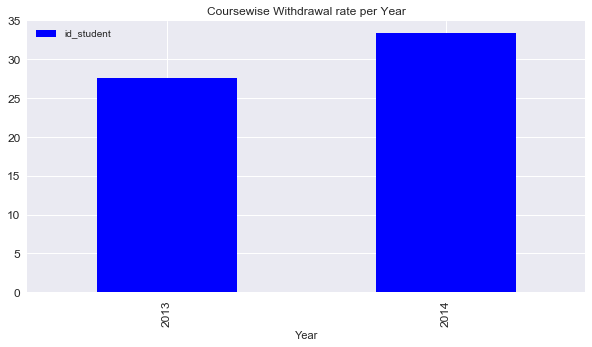

In [11]:
# <aghatpande> on 01-Nov-2017
# Check the enrollment in each year
groupbyStudentRegistrationPerYearDF = studentRegistrationDF[["Year", "id_student"]].groupby(["Year"]).agg({'id_student':'count'})
#groupbyStudentRegistrationPerYearDF
registrationRatePerYearDF = (groupbyStudentRegistrationPerYearDF / len(studentRegistrationDF)) *100
#registrationRatePerYearDF
registrationRatePerYearDF.plot(kind='bar', title = "Registration rate per Year",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each year
groupbyStudentWithdrawalPerYearDF = unregisteredCoursesDF[["Year", "id_student"]].groupby("Year").agg({'id_student':'count'})
#groupbyStudentWithdrawalPerYearDF
#Take the ratio to find the withdrawal rate per Year
withdrawalRatePerYearDF = ((groupbyStudentWithdrawalPerYearDF / groupbyStudentRegistrationPerYearDF)*100)
#withdrawalRatePerYearDF
withdrawalRatePerYearDF.plot(kind='bar', title = "Coursewise Withdrawal rate per Year",figsize=(10,5), color="b", fontsize=12 )

#### Let find the Term wise Registration rate and Withdrawal rate

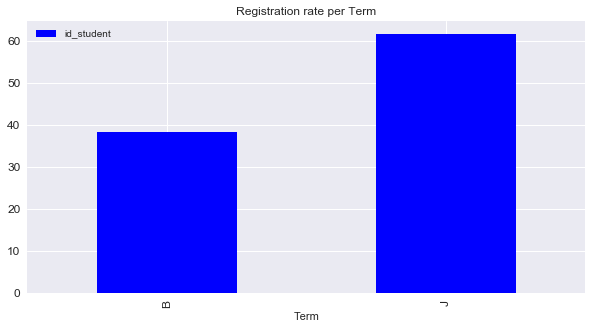

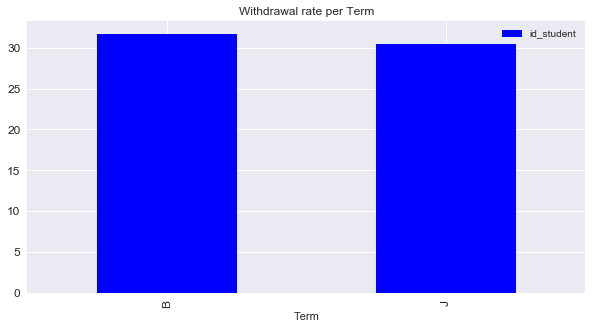

In [12]:
# <aghatpande> on 01-Nov-2017
# Check the enrollment in each Term
groupbyStudentRegistrationPerTermDF = studentRegistrationDF[["Term", "id_student"]].groupby(["Term"]).agg({'id_student':'count'})
#groupbyStudentRegistrationPerTermDF
#Take the ratio to find the Registration rate per Term
registrationRatePerTermDF = (groupbyStudentRegistrationPerTermDF / len(studentRegistrationDF)) *100
#registrationRatePerTermDF
registrationRatePerTermDF.plot(kind='bar', title = "Registration rate per Term",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each Term
groupbyStudentWithdrawalPerTermDF = unregisteredCoursesDF[["Term", "id_student"]].groupby("Term").agg({'id_student':'count'})
#groupbyStudentWithdrawalPerTermDF
#Take the ratio to find the withdrawal rate per Term
withdrawalRatePerTermDF = ((groupbyStudentWithdrawalPerTermDF / groupbyStudentRegistrationPerTermDF)*100)
#withdrawalRatePerTermDF
withdrawalRatePerTermDF.plot(kind='bar', title = "Withdrawal rate per Term",figsize=(10,5), color="b", fontsize=12 )

#### Lets find the Gender wise distribution of students

In [13]:
# <aghatpande> on 28-Oct-2017
# Sepearate out the Dataframes based on Gender
studentInfoWithStudentRegistrationsDF = pd.merge(studentRegistrationDF, studentInfoDF, how='left', on=['id_student', 'code_module', 'code_presentation'])
studentInfoWithStudentRegistrationsUnregisteredDF = studentInfoWithStudentRegistrationsDF[studentInfoWithStudentRegistrationsDF.date_unregistration != "?"]
studentInfoWithStudentRegistrationsCompletedDF = studentInfoWithStudentRegistrationsDF[studentInfoWithStudentRegistrationsDF.date_unregistration != "?"]
femaleRegistrationsDF = studentInfoWithStudentRegistrationsDF[studentInfoWithStudentRegistrationsDF["gender"] == "F"]
maleRegistrationsDF = studentInfoWithStudentRegistrationsDF[studentInfoWithStudentRegistrationsDF["gender"] == "M"]
femaleUnregisteredCoursesDF = femaleRegistrationsDF[femaleRegistrationsDF.date_unregistration != "?"]
maleUnregisteredCoursesDF = maleRegistrationsDF[maleRegistrationsDF.date_unregistration != "?"]

In [14]:
# <aghatpande> on 02-Nov-2017
print("Overall student enrollment in Open university is", len(studentInfoWithStudentRegistrationsDF))
print("Overall Male student population as percentage of total enrollment is")
(len(maleRegistrationsDF)+ 0.0)/len(studentInfoWithStudentRegistrationsDF) * 100

('Overall student enrollment in Open university is', 32593)
Overall Male student population as percentage of total enrollment is


54.843064461694226

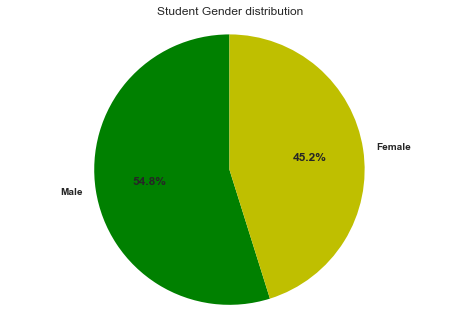

In [15]:
# <aghatpande> on 28-Oct-2017
# Using matplotlib for gender distribution pie chart
fig1, ax1 = plt.subplots()
plt.title("Student Gender distribution");
plt.pie(studentInfoWithStudentRegistrationsDF["gender"].value_counts().tolist(), colors=["g", "y"], labels=["Male", "Female"], startangle=90, autopct='%.1f%%', textprops={'weight': 'bold'});
ax1.axis('equal');

#### Lets find the overall final result for all students

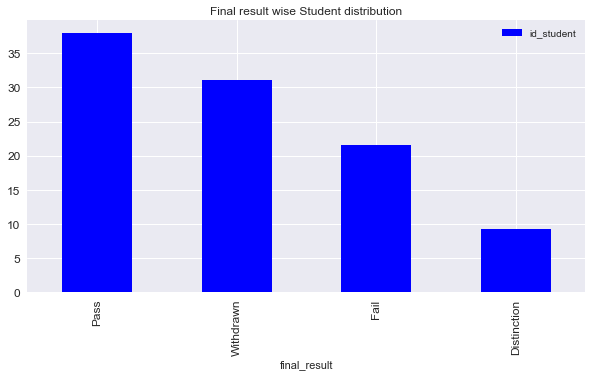

In [119]:
# <aghatpande> on 28-Oct-2017
# Check the Final result of all students
groupbyStudentRegistrationPerResultDF = studentInfoWithStudentRegistrationsDF[["final_result", "id_student"]].groupby(["final_result"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyStudentRegistrationPerResultDF

studentRegistrationRatePerResultDF = (groupbyStudentRegistrationPerResultDF / len(studentInfoWithStudentRegistrationsDF)) *100
#studentRegistrationRatePerResultDF
studentRegistrationRatePerResultDF.plot(kind='bar', title = "Final result wise Student distribution",figsize=(10,5), color="b", fontsize=12 )

groupbyStudentRegistrationPerResultPerRegionDF = studentInfoWithStudentRegistrationsDF[["final_result", "region", "id_student"]].groupby(["final_result", "region"]).agg({'id_student':'count'})
#groupbyStudentRegistrationPerResultPerRegionDF

groupbyStudentRegistrationPerRegion = studentInfoWithStudentRegistrationsDF[["region", "id_student"]].groupby("region").agg({'id_student':'count'})
#groupbyStudentRegistrationPerRegion

finalResultPerRegionRate = (groupbyStudentRegistrationPerResultPerRegionDF / groupbyStudentRegistrationPerRegion) *100
#finalResultPerRegionRate

#### Lets find Age wise registration and withdrawal rate in Females and Males

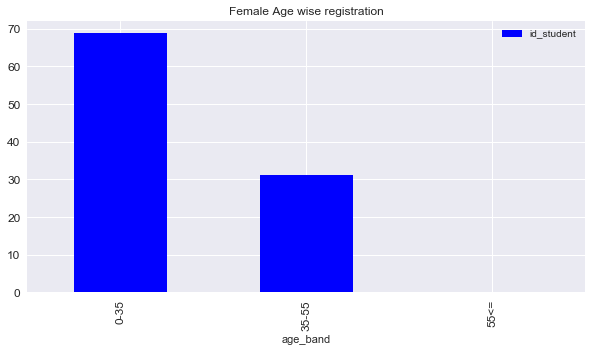

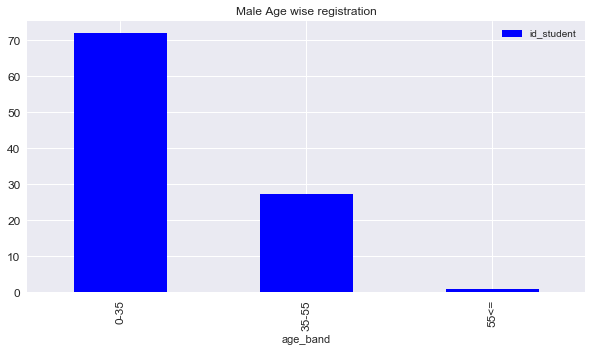

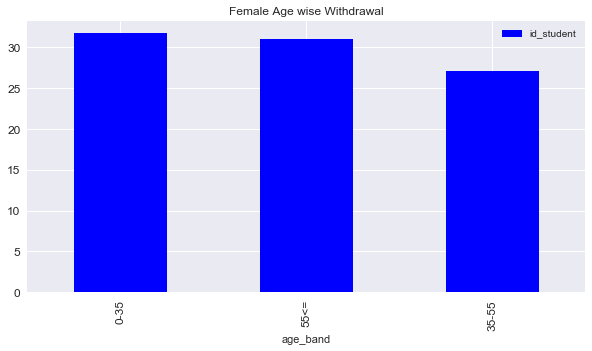

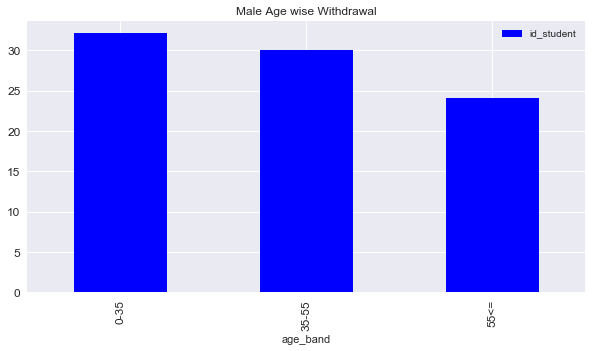

In [43]:
# <aghatpande> on 28-Oct-2017
# Check the Age wise registration of each Gender
groupbyFemaleStudentRegistrationPerAgeDF = femaleRegistrationsDF[["age_band", "id_student"]].groupby(["age_band"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyFemaleStudentRegistrationPerAgeDF
groupbyMaleStudentRegistrationPerAgeDF = maleRegistrationsDF[["age_band", "id_student"]].groupby(["age_band"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyMaleStudentRegistrationPerAgeDF

femaleRegistrationRatePerAgeDF = (groupbyFemaleStudentRegistrationPerAgeDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerAgeDF
femaleRegistrationRatePerAgeDF.plot(kind='bar', title = "Female Age wise registration",figsize=(10,5), color="b", fontsize=12 )
maleRegistrationRatePerAgeDF = (groupbyMaleStudentRegistrationPerAgeDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerAgeDF
maleRegistrationRatePerAgeDF.plot(kind='bar', title = "Male Age wise registration",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawal of each Gender in each course
groupbyFemaleStudentWithdrawalPerAgeDF = femaleUnregisteredCoursesDF[["age_band", "id_student"]].groupby(["age_band"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyFemaleStudentWithdrawalPerAgeDF
groupbyMaleStudentWithdrawalPerAgeDF = maleUnregisteredCoursesDF[["age_band", "id_student"]].groupby(["age_band"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyMaleStudentWithdrawalPerAgeDF

#Take the ratio to find the withdrawal rate
femaleWithdrawalRatePerAgeDF = ((groupbyFemaleStudentWithdrawalPerAgeDF / groupbyFemaleStudentRegistrationPerAgeDF)*100).sort_values("id_student", ascending= False)
#femaleWithdrawalRatePerAgeDF
femaleWithdrawalRatePerAgeDF.plot(kind='bar', title = "Female Age wise Withdrawal",figsize=(10,5), color="b", fontsize=12 )

#Take the ratio to find the withdrawal rate
maleWithdrawalRatePerAgeDF = ((groupbyMaleStudentWithdrawalPerAgeDF / groupbyMaleStudentRegistrationPerAgeDF)*100).sort_values("id_student", ascending= False)
#maleWithdrawalRatePerAgeDF
maleWithdrawalRatePerAgeDF.plot(kind='bar', title = "Male Age wise Withdrawal",figsize=(10,5), color="b", fontsize=12 )

#### Lets find "final_result" based registration and withdrawal rates of female and male students

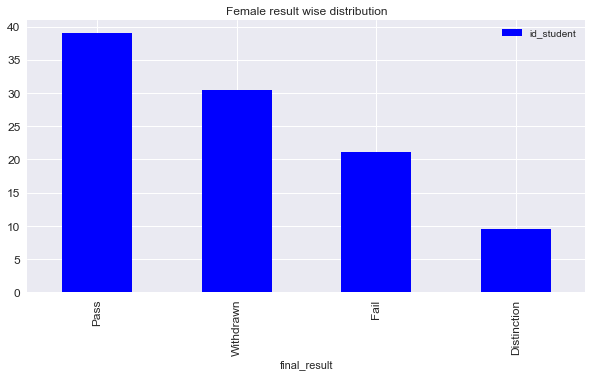

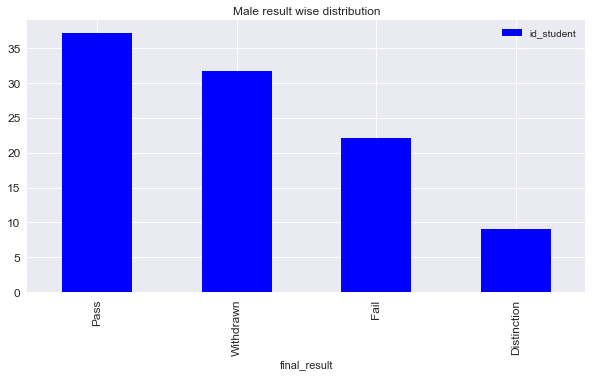

In [44]:
# <aghatpande> on 28-Oct-2017
# Check the Final result wise registration of each Gender
groupbyFemaleStudentRegistrationPerResultDF = femaleRegistrationsDF[["final_result", "id_student"]].groupby(["final_result"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyFemaleStudentRegistrationPerResultDF
groupbyMaleStudentRegistrationPerResultDF = maleRegistrationsDF[["final_result", "id_student"]].groupby(["final_result"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyMaleStudentRegistrationPerResultDF

femaleRegistrationRatePerResultDF = (groupbyFemaleStudentRegistrationPerResultDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerResultDF
femaleRegistrationRatePerResultDF.plot(kind='bar', title = "Female result wise distribution",figsize=(10,5), color="b", fontsize=12 )
maleRegistrationRatePerResultDF = (groupbyMaleStudentRegistrationPerResultDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerResultDF
maleRegistrationRatePerResultDF.plot(kind='bar', title = "Male result wise distribution",figsize=(10,5), color="b", fontsize=12 )

#### Lets find course based registration and withdrawal rate for each gender

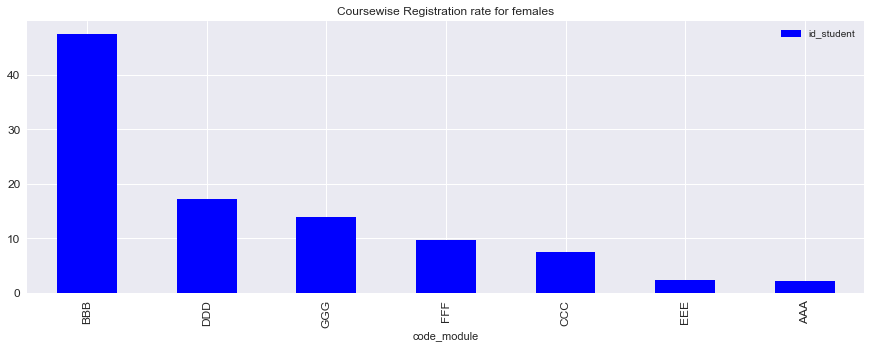

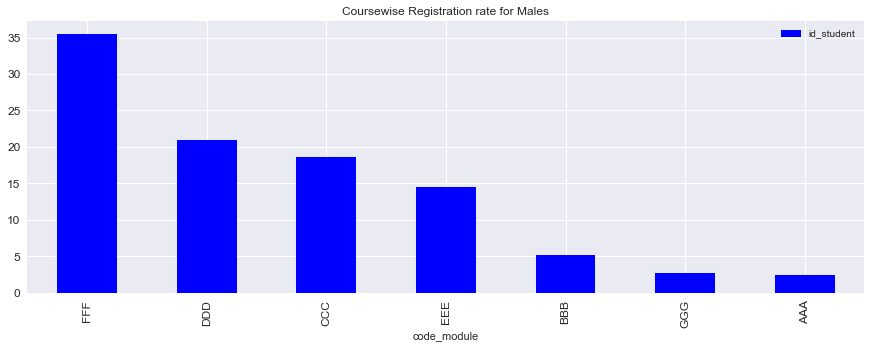

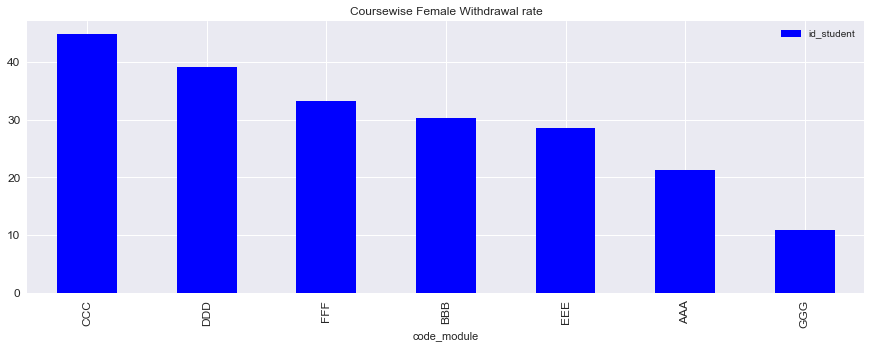

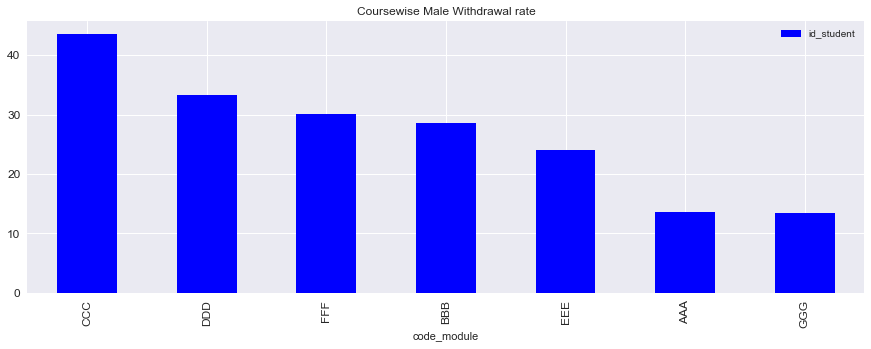

In [50]:
# <aghatpande> on 28-Oct-2017
# Check the enrollment of each Gender in each course
groupbyFemaleStudentRegistrationPerCourseDF = femaleRegistrationsDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyFemaleStudentRegistrationPerCourseDF
groupbyMaleStudentRegistrationPerCourseDF = maleRegistrationsDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyMaleStudentRegistrationPerCourseDF

femaleRegistrationRatePerCourseDF = (groupbyFemaleStudentRegistrationPerCourseDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerCourseDF
femaleRegistrationRatePerCourseDF.plot(kind='bar', title = "Coursewise Registration rate for females",figsize=(15,5), color="b", fontsize=12 )
maleRegistrationRatePerCourseDF = (groupbyMaleStudentRegistrationPerCourseDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerCourseDF
maleRegistrationRatePerCourseDF.plot(kind='bar', title = "Coursewise Registration rate for Males",figsize=(15,5), color="b", fontsize=12 )

# Check the withdrawal of each Gender in each course
groupbyFemaleStudentWithdrawalPerCourseDF = femaleUnregisteredCoursesDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyFemaleStudentWithdrawalPerCourseDF
groupbyMaleStudentWithdrawalPerCourseDF = maleUnregisteredCoursesDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyMaleStudentWithdrawalPerCourseDF

#Take the ratio to find the withdrawal rate
femaleWithdrawalRatePerCourseDF = ((groupbyFemaleStudentWithdrawalPerCourseDF / groupbyFemaleStudentRegistrationPerCourseDF)*100).sort_values("id_student", ascending= False)
#femaleWithdrawalRatePerCourseDF
femaleWithdrawalRatePerCourseDF.plot(kind='bar', title = "Coursewise Female Withdrawal rate",figsize=(15,5), color="b", fontsize=12 )

#Take the ratio to find the withdrawal rate
maleWithdrawalRatePerCourseDF = ((groupbyMaleStudentWithdrawalPerCourseDF / groupbyMaleStudentRegistrationPerCourseDF)*100).sort_values("id_student", ascending= False)
#maleWithdrawalRatePerCourseDF
maleWithdrawalRatePerCourseDF.plot(kind='bar', title = "Coursewise Male Withdrawal rate",figsize=(15,5), color="b", fontsize=12 )

#### Lets check Year wise registration and withdrawal rates for each gender

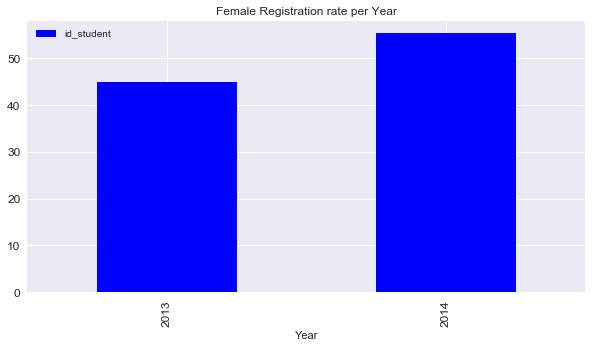

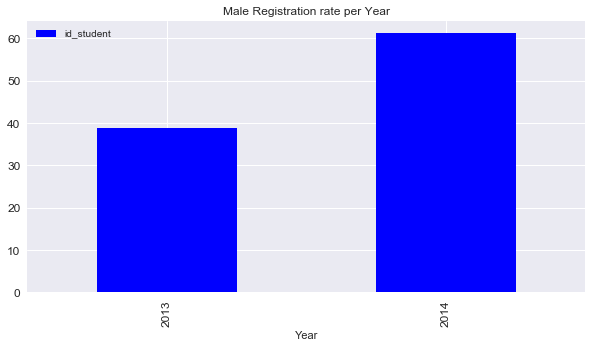

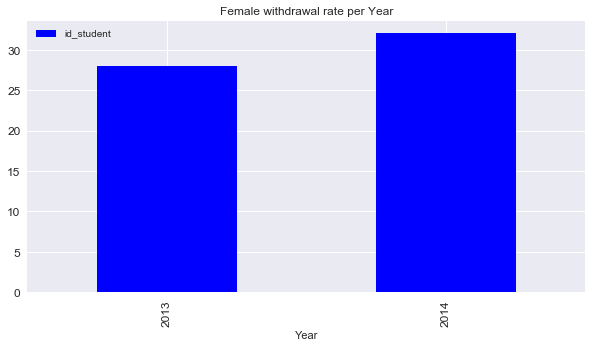

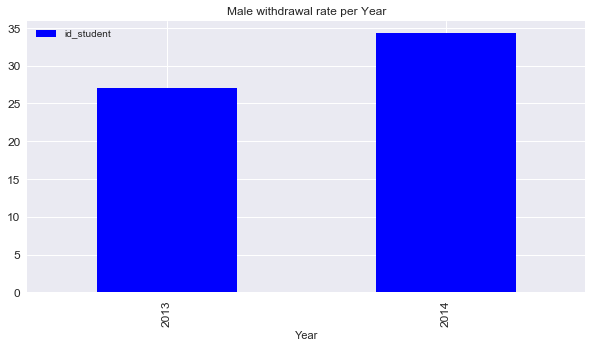

In [19]:
# <aghatpande> on 28-Oct-2017
# Check the Per year registration
groupbyFemaleStudentRegistrationPerYearDF = femaleRegistrationsDF[["Year", "id_student"]].groupby(["Year"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerYearDF
femaleRegistrationRatePerYearDF = (groupbyFemaleStudentRegistrationPerYearDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerYearDF
femaleRegistrationRatePerYearDF.plot(kind='bar', title = "Female Registration rate per Year",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerYearDF = maleRegistrationsDF[["Year", "id_student"]].groupby(["Year"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerYearDF
maleRegistrationRatePerYearDF = (groupbyMaleStudentRegistrationPerYearDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerYearDF
maleRegistrationRatePerYearDF.plot(kind='bar', title = "Male Registration rate per Year",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each year
groupbyFemaleStudentWithdrawalPerYearDF = femaleUnregisteredCoursesDF[["Year", "id_student"]].groupby("Year").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerYearDF
#Take the ratio to find the withdrawal rate per Year
femaleWithdrawalRatePerYearDF = ((groupbyFemaleStudentWithdrawalPerYearDF / groupbyFemaleStudentRegistrationPerYearDF)*100)
#femaleWithdrawalRatePerYearDF
femaleWithdrawalRatePerYearDF.plot(kind='bar', title = "Female withdrawal rate per Year",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerYearDF = maleUnregisteredCoursesDF[["Year", "id_student"]].groupby("Year").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerYearDF
#Take the ratio to find the withdrawal rate per Year
maleWithdrawalRatePerYearDF = ((groupbyMaleStudentWithdrawalPerYearDF / groupbyMaleStudentRegistrationPerYearDF)*100)
#maleWithdrawalRatePerYearDF
maleWithdrawalRatePerYearDF.plot(kind='bar', title = "Male withdrawal rate per Year",figsize=(10,5), color="b", fontsize=12 )

#### Lets check registration and withdrawal rates per term for each gender

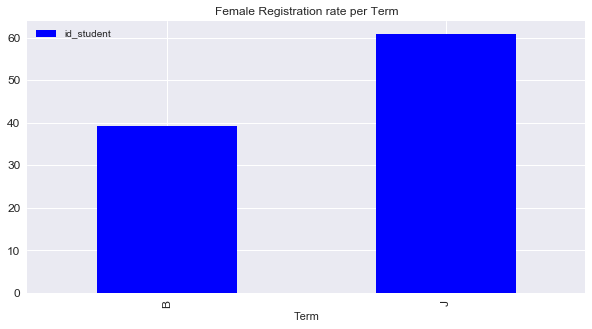

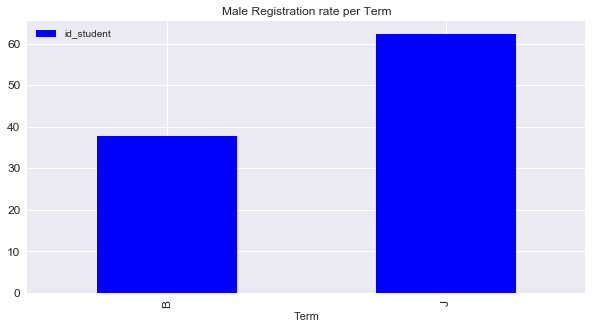

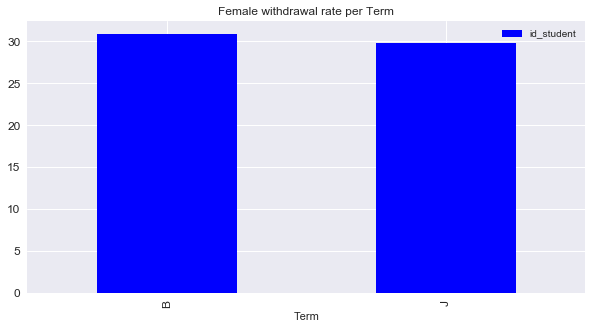

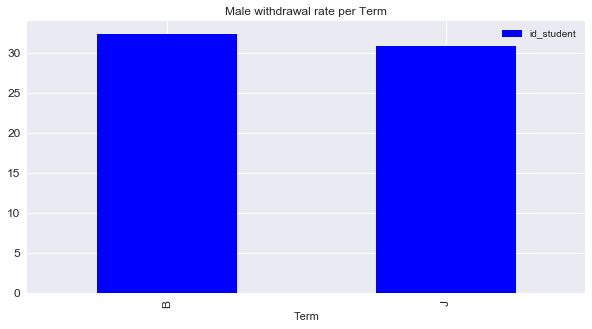

In [20]:
# <aghatpande> on 28-Oct-2017
# Check the enrollment in each Term of each Gender
groupbyFemaleStudentRegistrationPerTermDF = femaleRegistrationsDF[["Term", "id_student"]].groupby(["Term"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerTermDF
femaleRegistrationRatePerTermDF = (groupbyFemaleStudentRegistrationPerTermDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerTermDF
femaleRegistrationRatePerTermDF.plot(kind='bar', title = "Female Registration rate per Term",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerTermDF = maleRegistrationsDF[["Term", "id_student"]].groupby(["Term"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerTermDF
maleRegistrationRatePerTermDF = (groupbyMaleStudentRegistrationPerTermDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerTermDF
maleRegistrationRatePerTermDF.plot(kind='bar', title = "Male Registration rate per Term",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each Term
groupbyFemaleStudentWithdrawalPerTermDF = femaleUnregisteredCoursesDF[["Term", "id_student"]].groupby("Term").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerTermDF
#Take the ratio to find the withdrawal rate per Year
femaleWithdrawalRatePerTermDF = ((groupbyFemaleStudentWithdrawalPerTermDF / groupbyFemaleStudentRegistrationPerTermDF)*100)
#femaleWithdrawalRatePerTermDF
femaleWithdrawalRatePerTermDF.plot(kind='bar', title = "Female withdrawal rate per Term",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerTermDF = maleUnregisteredCoursesDF[["Term", "id_student"]].groupby("Term").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerTermDF
#Take the ratio to find the withdrawal rate per Year
maleWithdrawalRatePerTermDF = ((groupbyMaleStudentWithdrawalPerTermDF / groupbyMaleStudentRegistrationPerTermDF)*100)
#maleWithdrawalRatePerTermDF
maleWithdrawalRatePerTermDF.plot(kind='bar', title = "Male withdrawal rate per Term",figsize=(10,5), color="b", fontsize=12 )

#### Lets analyze the registration rate and withdrawal rate as per Education level for each gender

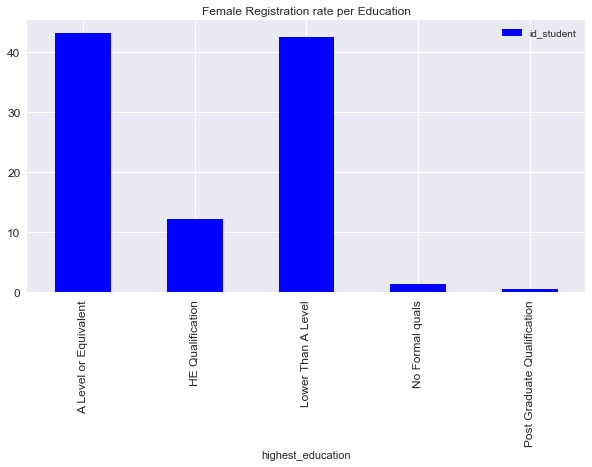

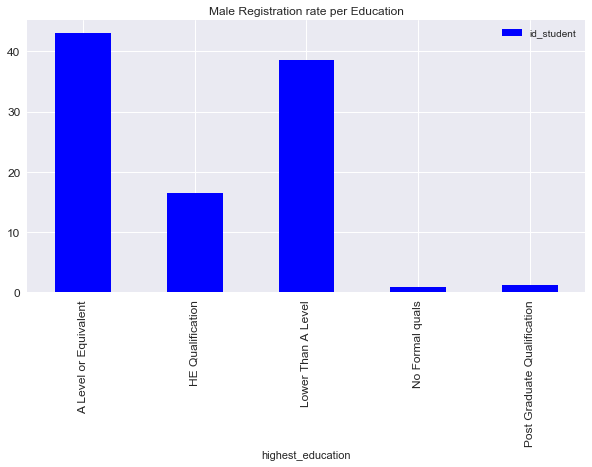

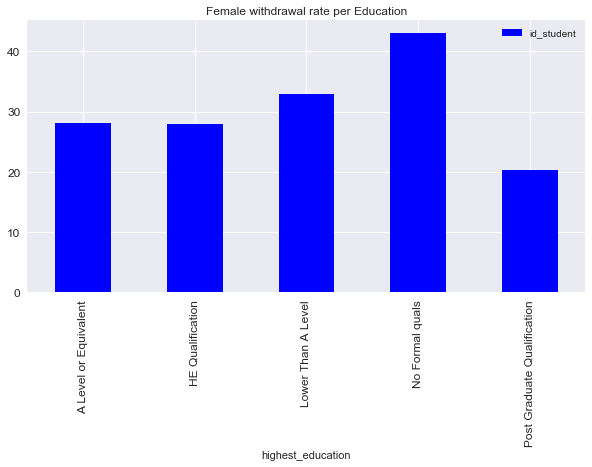

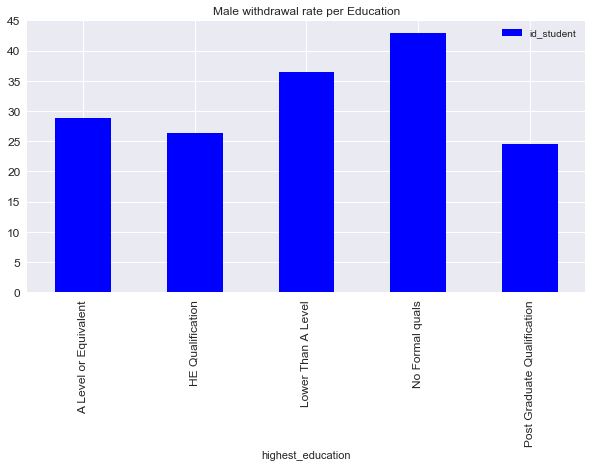

In [21]:
# <aghatpande> on 28-Oct-2017
# Check the enrollment in each Education
groupbyFemaleStudentRegistrationPerEducationDF = femaleRegistrationsDF[["highest_education", "id_student"]].groupby(["highest_education"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerEducationDF
femaleRegistrationRatePerEducationDF = (groupbyFemaleStudentRegistrationPerEducationDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerEducationDF
femaleRegistrationRatePerEducationDF.plot(kind='bar', title = "Female Registration rate per Education",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerEducationDF = maleRegistrationsDF[["highest_education", "id_student"]].groupby(["highest_education"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerEducationDF
maleRegistrationRatePerEducationDF = (groupbyMaleStudentRegistrationPerEducationDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerEducationDF
maleRegistrationRatePerEducationDF.plot(kind='bar', title = "Male Registration rate per Education",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each Education
groupbyFemaleStudentWithdrawalPerEducationDF = femaleUnregisteredCoursesDF[["highest_education", "id_student"]].groupby("highest_education").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerEducationDF
#Take the ratio to find the withdrawal rate per Education level
femaleWithdrawalRatePerEducationDF = ((groupbyFemaleStudentWithdrawalPerEducationDF / groupbyFemaleStudentRegistrationPerEducationDF)*100)
#femaleWithdrawalRatePerEducationDF
femaleWithdrawalRatePerEducationDF.plot(kind='bar', title = "Female withdrawal rate per Education",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerEducationDF = maleUnregisteredCoursesDF[["highest_education", "id_student"]].groupby("highest_education").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerEducationDF
#Take the ratio to find the withdrawal rate per Year
maleWithdrawalRatePerEducationDF = ((groupbyMaleStudentWithdrawalPerEducationDF / groupbyMaleStudentRegistrationPerEducationDF)*100)
#maleWithdrawalRatePerEducationDF
maleWithdrawalRatePerEducationDF.plot(kind='bar', title = "Male withdrawal rate per Education",figsize=(10,5), color="b", fontsize=12 )

#### Lets analyze the registration rate and withdrawal rate per gender as per imd_band 

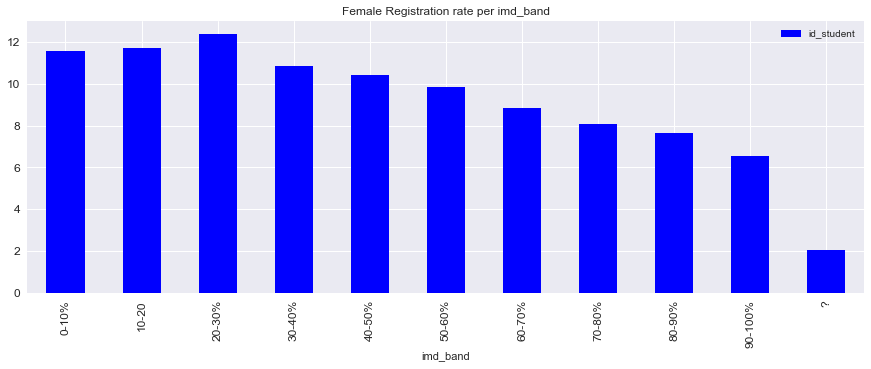

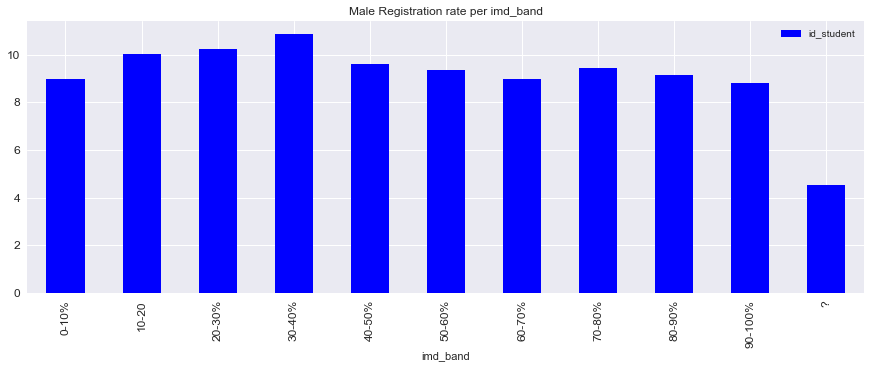

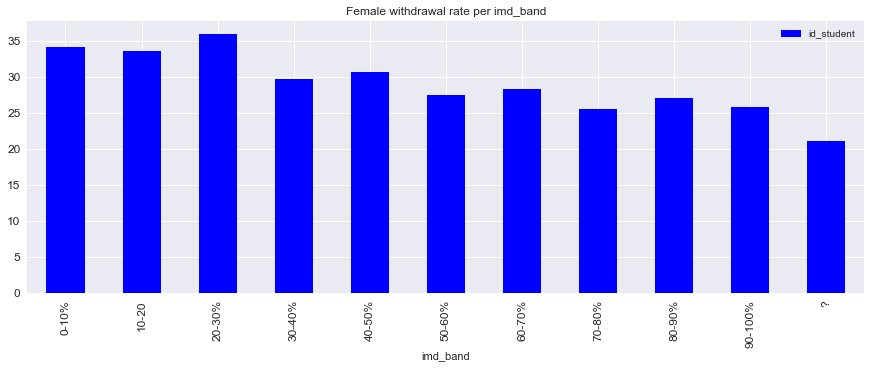

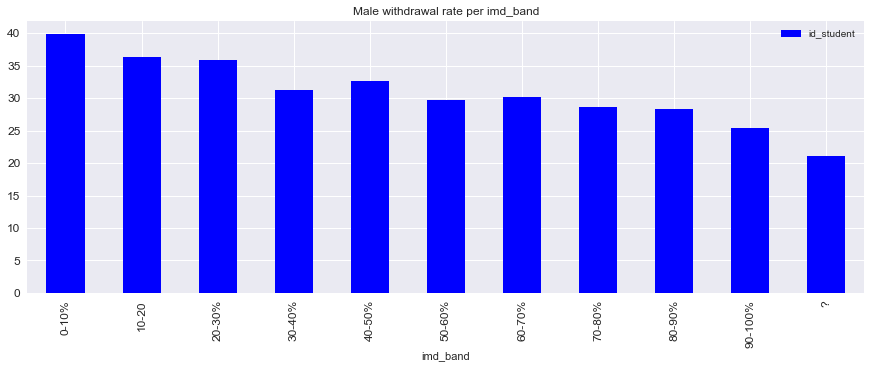

In [22]:
# <aghatpande> on 02-Nov-2017
# Check the enrollment in each imd_band
groupbyFemaleStudentRegistrationPerIMDDF = femaleRegistrationsDF[["imd_band", "id_student"]].groupby(["imd_band"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerIMDDF
femaleRegistrationRatePerIMDDF = (groupbyFemaleStudentRegistrationPerIMDDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerIMDDF
femaleRegistrationRatePerIMDDF.plot(kind='bar', title = "Female Registration rate per imd_band",figsize=(15,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerIMDDF = maleRegistrationsDF[["imd_band", "id_student"]].groupby(["imd_band"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerIMDDF
maleRegistrationRatePerIMDDF = (groupbyMaleStudentRegistrationPerIMDDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerIMDDF
maleRegistrationRatePerIMDDF.plot(kind='bar', title = "Male Registration rate per imd_band",figsize=(15,5), color="b", fontsize=12 )

# Check the withdrawals in each Education
groupbyFemaleStudentWithdrawalPerIMDDF = femaleUnregisteredCoursesDF[["imd_band", "id_student"]].groupby("imd_band").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerIMDDF
#Take the ratio to find the withdrawal rate per Education level
femaleWithdrawalRatePerIMDDF = ((groupbyFemaleStudentWithdrawalPerIMDDF / groupbyFemaleStudentRegistrationPerIMDDF )*100)
#femaleWithdrawalRatePerIMDDF
femaleWithdrawalRatePerIMDDF.plot(kind='bar', title = "Female withdrawal rate per imd_band",figsize=(15,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerIMDDF = maleUnregisteredCoursesDF[["imd_band", "id_student"]].groupby("imd_band").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerIMDDF
#Take the ratio to find the withdrawal rate per Year
maleWithdrawalRatePerIMDDF = ((groupbyMaleStudentWithdrawalPerIMDDF / groupbyMaleStudentRegistrationPerIMDDF)*100)
#maleWithdrawalRatePerIMDDF
maleWithdrawalRatePerIMDDF.plot(kind='bar', title = "Male withdrawal rate per imd_band",figsize=(15,5), color="b", fontsize=12 )

#### Lets analyze the registration rate and withdrawal rate per gender as per Disability

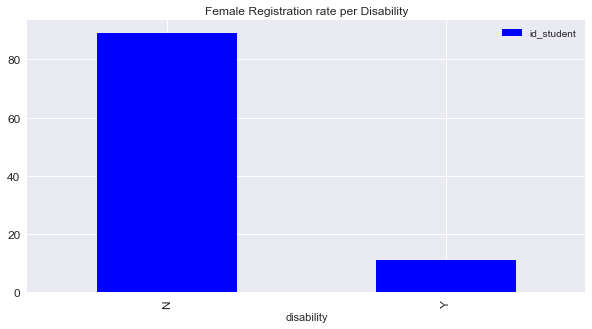

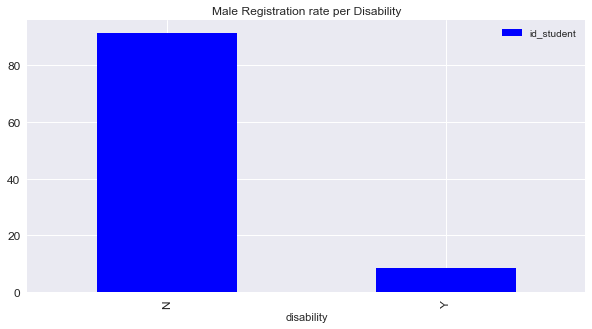

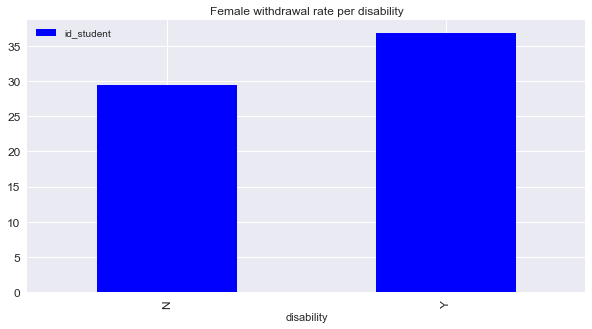

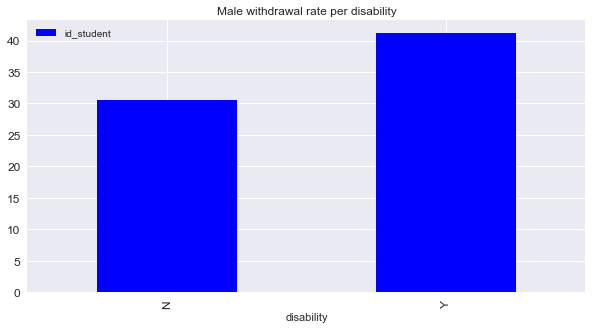

In [23]:
# <aghatpande> on 28-Oct-2017
# Check the enrollment in each Disability
groupbyFemaleStudentRegistrationPerDisabilityDF = femaleRegistrationsDF[["disability", "id_student"]].groupby(["disability"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerDisabilityDF
femaleRegistrationRatePerDisabilityDF = (groupbyFemaleStudentRegistrationPerDisabilityDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerDisabilityDF
femaleRegistrationRatePerDisabilityDF.plot(kind='bar', title = "Female Registration rate per Disability",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerDisabilityDF = maleRegistrationsDF[["disability", "id_student"]].groupby(["disability"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerDisabilityDF
maleRegistrationRatePerDisabilityDF = (groupbyMaleStudentRegistrationPerDisabilityDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerDisabilityDF
maleRegistrationRatePerDisabilityDF.plot(kind='bar', title = "Male Registration rate per Disability",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each Disability
groupbyFemaleStudentWithdrawalPerDisabilityDF = femaleUnregisteredCoursesDF[["disability", "id_student"]].groupby("disability").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerDisabilityDF
#Take the ratio to find the withdrawal rate per Disability
femaleWithdrawalRatePerDisabilityDF = ((groupbyFemaleStudentWithdrawalPerDisabilityDF / groupbyFemaleStudentRegistrationPerDisabilityDF)*100)
#femaleWithdrawalRatePerDisabilityDF
femaleWithdrawalRatePerDisabilityDF.plot(kind='bar', title = "Female withdrawal rate per disability",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerDisabilityDF = maleUnregisteredCoursesDF[["disability", "id_student"]].groupby("disability").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerDisabilityDF
#Take the ratio to find the withdrawal rate per Disability
maleWithdrawalRatePerDisabilityDF = ((groupbyMaleStudentWithdrawalPerDisabilityDF / groupbyMaleStudentRegistrationPerDisabilityDF)*100)
#maleWithdrawalRatePerDisabilityDF
maleWithdrawalRatePerDisabilityDF.plot(kind='bar', title = "Male withdrawal rate per disability",figsize=(10,5), color="b", fontsize=12 )

#### Lets analyze the registration rate and withdrawal rate per gender as per geograhical region

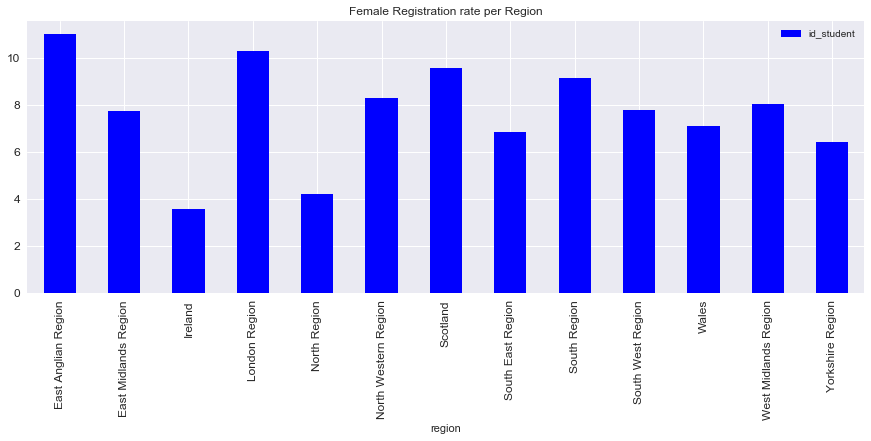

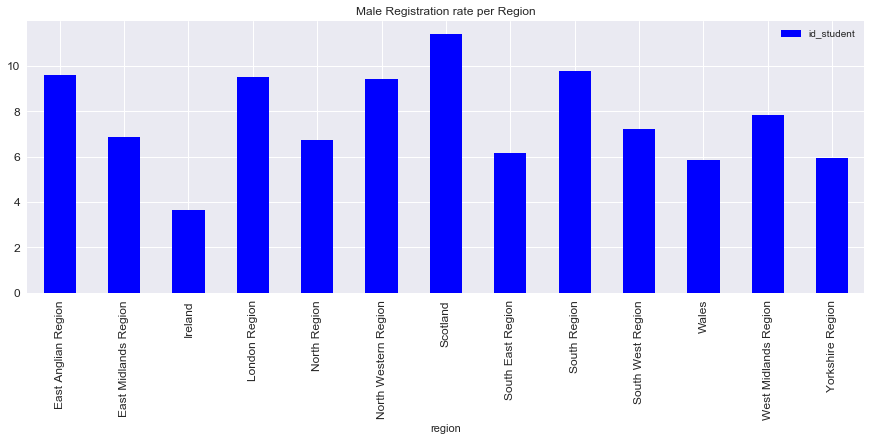

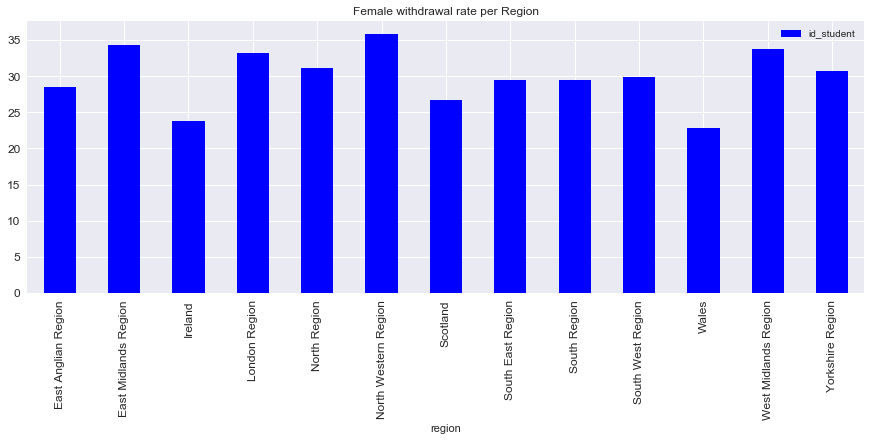

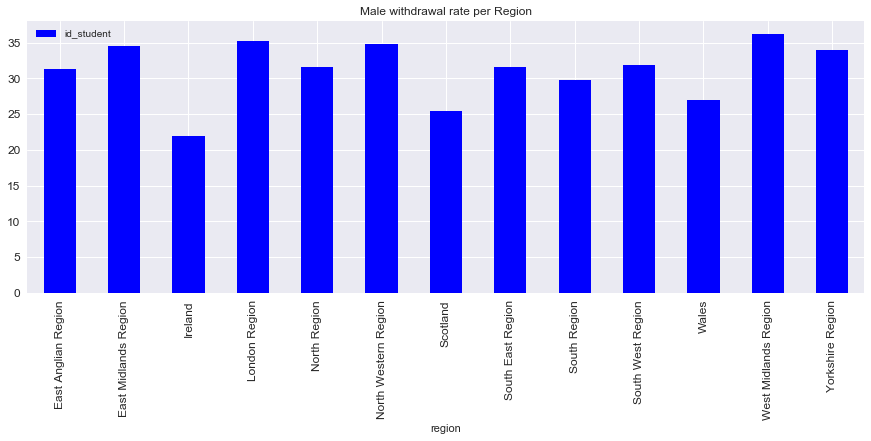

In [24]:
# <aghatpande> on 02-Nov-2017
# Check the enrollment in each region
groupbyFemaleStudentRegistrationPerRegionDF = femaleRegistrationsDF[["region", "id_student"]].groupby(["region"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerRegionDF
femaleRegistrationRatePerRegionDF = (groupbyFemaleStudentRegistrationPerRegionDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerRegionDF
femaleRegistrationRatePerRegionDF.plot(kind='bar', title = "Female Registration rate per Region",figsize=(15,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerRegionDF = maleRegistrationsDF[["region", "id_student"]].groupby(["region"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerRegionDF
maleRegistrationRatePerRegionDF = (groupbyMaleStudentRegistrationPerRegionDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerRegionDF
maleRegistrationRatePerRegionDF.plot(kind='bar', title = "Male Registration rate per Region",figsize=(15,5), color="b", fontsize=12 )

# Check the withdrawals in each Region
groupbyFemaleStudentWithdrawalPerRegionDF = femaleUnregisteredCoursesDF[["region", "id_student"]].groupby("region").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerRegionDF
#Take the ratio to find the withdrawal rate per Region
femaleWithdrawalRatePerRegionDF = ((groupbyFemaleStudentWithdrawalPerRegionDF / groupbyFemaleStudentRegistrationPerRegionDF)*100)
#femaleWithdrawalRatePerRegionDF
femaleWithdrawalRatePerRegionDF.plot(kind='bar', title = "Female withdrawal rate per Region",figsize=(15,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerRegionDF = maleUnregisteredCoursesDF[["region", "id_student"]].groupby("region").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerRegionDF
#Take the ratio to find the withdrawal rate per Region
maleWithdrawalRatePerRegionDF = ((groupbyMaleStudentWithdrawalPerRegionDF / groupbyMaleStudentRegistrationPerRegionDF)*100)
#maleWithdrawalRatePerRegionDF
maleWithdrawalRatePerRegionDF.plot(kind='bar', title = "Male withdrawal rate per Region",figsize=(15,5), color="b", fontsize=12 )

#### Lets do analysis on student VLE interactions

In [297]:
# <aghatpande> on 02-Nov-2017
# Merge the StudentVLE with VLEInfo to find the impact of clicks on withdrawal
studentVLEInteractionDF = pd.merge(studentVleDF, vleDF, how='left', on=['id_site', 'code_module', 'code_presentation'])
studentVLEInteractionWithStudentRegistrationAndInfoDF = pd.merge(studentVLEInteractionDF, studentInfoWithStudentRegistrationsDF, how='left', on=['id_student', 'code_module', 'code_presentation'])

In [ ]:
# <aghatpande> on 02-Nov-2017
# Lets seperate out different dataframes so that they can be used further in the code
femaleVLEDF = studentVLEInteractionWithStudentRegistrationAndInfoDF[studentVLEInteractionWithStudentRegistrationAndInfoDF.gender == 'F']
maleVLEDF = studentVLEInteractionWithStudentRegistrationAndInfoDF[studentVLEInteractionWithStudentRegistrationAndInfoDF.gender == 'M']
withdrawnFemaleVLEDF = femaleVLEDF[femaleVLEDF.date_unregistration != "?"]
completedFemaleVLEDF = femaleVLEDF[femaleVLEDF.date_unregistration == "?"]
withdrawnMaleVLEDF = maleVLEDF[maleVLEDF.date_unregistration != "?"]
completedMaleVLEDF = maleVLEDF[maleVLEDF.date_unregistration == "?"]

In [36]:
# <aghatpande> on 02-Nov-2017
# The Dataframes for overall course withdrawal and completion with StudentVLE information
courseWithdrawnVLEDF = studentVLEInteractionWithStudentRegistrationAndInfoDF[studentVLEInteractionWithStudentRegistrationAndInfoDF.date_unregistration != "?"]
courseCompletedVLEDF = studentVLEInteractionWithStudentRegistrationAndInfoDF[studentVLEInteractionWithStudentRegistrationAndInfoDF.date_unregistration == "?"]

In [38]:
# <aghatpande> on 02-Nov-2017
# Store the local copy of these Dataframes, so that we dont have to compute it again.

#courseCompletedVLEDF.to_csv("C:\\Ameya-Important\\OULAD\\Created-Dataframes\\courseCompletedVLEDF.csv")
#courseWithdrawnVLEDF.to_csv("C:\\Ameya-Important\\OULAD\\Created-Dataframes\\courseWithdrawnVLEDF.csv")
#femaleVLEDF.to_csv("C:\\Ameya-Important\\OULAD\\Created-Dataframes\\femaleVLEDF.csv")
#maleVLEDF.to_csv("C:\\Ameya-Important\\OULAD\\Created-Dataframes\\maleVLEDF.csv")
#withdrawnFemaleVLEDF.to_csv("C:\\Ameya-Important\\OULAD\\Created-Dataframes\\femaleWithdrawnVLEDF.csv")
#completedFemaleVLEDF.to_csv("C:\\Ameya-Important\\OULAD\\Created-Dataframes\\femaleCompletedVLEDF.csv")
#withdrawnMaleVLEDF.to_csv("C:\\Ameya-Important\\OULAD\\Created-Dataframes\\maleWithdrawnVLEDF.csv")
#completedMaleVLEDF.to_csv("C:\\Ameya-Important\\OULAD\\Created-Dataframes\\maleCompletedVLEDF.csv")

In [39]:
# <aghatpande> on 02-Nov-2017
# Calculate the total clicks per code_module
groupbyCourseCompletedVLEDF = courseCompletedVLEDF.groupby(["code_module","activity_type"]).agg({'sum_click':'sum'})
groupbyCourseWithdrawnVLEDF = courseWithdrawnVLEDF.groupby(["code_module","activity_type"]).agg({'sum_click':'sum'})

In [41]:
courseCompletionRatioDF = (groupbyCourseCompletedVLEDF / groupbyCourseWithdrawnVLEDF)

In [65]:
groupbyCompletedCoursesClicks = courseCompletedVLEDF.groupby("activity_type").agg({'sum_click':'sum'})
groupbyUnregisteredCoursesClicks = courseWithdrawnVLEDF.groupby("activity_type").agg({'sum_click':'sum'})

#### The following ratio will tell us which activity was done the most and least by students who withdrew from course

In [82]:
totalClicksForUnregisteredCourses = groupbyUnregisteredCoursesClicks["sum_click"].sum()
#totalClicksForUnregisteredCourses

3172300

In [193]:
#(groupbyUnregisteredCoursesClicks / totalClicksForUnregisteredCourses)*100

#### The following ratio will tell us which activity was done the most and least by students who completed the course

In [194]:
totalClicksForCompletedCourses = groupbyCompletedCoursesClicks["sum_click"].sum()
#totalClicksForCompletedCourses

In [197]:
#(groupbyCompletedCoursesClicks / totalClicksForCompletedCourses)*100

#### Lets analyze how much more interaction students did with the VLE when they completed the course 

In [196]:
totalClicksForCompletedCourses / totalClicksForUnregisteredCourses

11

#### Activity wise interaction ratio of completed to withdrawn courses

In [198]:
overallClicksRatio = (groupbyCompletedCoursesClicks / groupbyUnregisteredCoursesClicks)
#overallClicksRatio

## Lets find out the most important parameters for Churn/success

#### Dependent variable - final_result
#### Independent variables are
1. sum_click
2. registration_week
3. gender
4. region
5. highest_education
6. imd_band
7. age_band
8. num_of_previous_attempts
9. disability
10. week_to

#### Lets find the churn parameters for course AAA

In [288]:
# <aghatpande> on 02-Nov-2017
coursesAAADF = studentVLEInteractionWithStudentRegistrationAndInfoDF[studentVLEInteractionWithStudentRegistrationAndInfoDF.code_module == "AAA"]

sumOfclicksForcoursesAAADF = coursesAAADF.groupby(["code_module", "code_presentation", "id_student"]).agg({"sum_click":"sum"})

sumOfclicksForcoursesAAADF.to_csv("C:\\Ameya-Important\\OULAD\\Created-Dataframes\\sumOfClicksForCourseAAA.csv")
sumOfClicksForAAADF = pd.read_csv("C:\\Ameya-Important\\OULAD\\Created-Dataframes\\sumOfClicksForCourseAAA.csv")
sumOfClicksForAAADF["Totalclicks"] = sumOfClicksForAAADF["sum_click"]

In [113]:
removeDuplicatesCoursesAAADF = coursesAAADF.drop_duplicates(["code_module", "code_presentation", "id_student"])

In [234]:
dataForCourseAAADF = pd.merge(removeDuplicatesCoursesAAADF, sumOfClicksForAAADF, how='left', on=['id_student', 'code_module', 'code_presentation'])

In [235]:
def changeFinalResultToNumber(x):
    if x == "Withdrawn":
        return int(0)
    else:
        return int(1)

In [236]:
dataForCourseAAADF["FinalResult"] = dataForCourseAAADF["final_result"].apply(lambda x: changeFinalResultToNumber(x))

In [239]:
# <aghatpande> on 02-Nov-2017
# select the columns for running the model
dataForRunningModel = dataForCourseAAADF[["date", "week_from", "week_to","date_registration", 'date_unregistration', "gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "Totalclicks", "FinalResult"]]

In [1]:
# <aghatpande> on 02-Nov-2017
# The DecisionTreeclassifier model will not accept "?" as inputs. Need to convert it
def convertQuestionMarksToZero(x):
    if x == "?":
        return int(0)
    else:
        return int(x)

In [242]:
dataForRunningModel["week_from"] = dataForRunningModel["week_from"].apply(lambda x: convertQuestionMarksToZero(x))
dataForRunningModel["week_to"] = dataForRunningModel["week_to"].apply(lambda x: convertQuestionMarksToZero(x))
dataForRunningModel["date_unregistration"] = dataForRunningModel["date_unregistration"].apply(lambda x: convertQuestionMarksToZero(x))

C:\Users\Ameya\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Ameya\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Ameya\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [243]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
y = dataForRunningModel["FinalResult"]
X = dataForRunningModel.drop(["FinalResult"], axis=1)

In [244]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
X_dummies = pd.get_dummies(X[["gender", "region", "highest_education", "imd_band", "age_band", "disability"]])

X = pd.concat([X, X_dummies], axis =1)

In [247]:
X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [249]:
# <aghatpande> on 02-Nov-2017
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

1. Feature Totalclicks (0.274823)
2. Feature date_registration (0.146730)
3. Feature date (0.067696)
4. Feature studied_credits (0.052179)
5. Feature imd_band_60-70% (0.046658)
6. Feature gender_F (0.039824)
7. Feature age_band_0-35 (0.024749)
8. Feature imd_band_70-80% (0.023379)
9. Feature highest_education_A Level or Equivalent (0.023006)
10. Feature gender_M (0.020046)
11. Feature highest_education_HE Qualification (0.019985)
12. Feature highest_education_Lower Than A Level (0.019858)
13. Feature imd_band_90-100% (0.019258)
14. Feature week_from (0.019137)
15. Feature region_Scotland (0.016830)
16. Feature region_South West Region (0.015689)
17. Feature age_band_35-55 (0.015263)
18. Feature imd_band_50-60% (0.013336)
19. Feature imd_band_80-90% (0.013181)
20. Feature imd_band_40-50% (0.012644)
21. Feature disability_N (0.012577)
22. Feature region_London Region (0.011453)
23. Feature region_North Western Region (0.010803)
24. Feature imd_band_0-10% (0.010671)
25. Feature region_Sou

### Accuracy of the Model

In [262]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [263]:
dt = tree.DecisionTreeClassifier()
dt.fit(X = X_train, y= y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [264]:
y_pred = dt.predict(X_test)

In [266]:
dt.score(X_test, y_test)

0.77828054298642535

#### Lets analyse the values of important features in dataset

In [289]:
# <aghatpande> on 02-Nov-2017
# selecting only the registrations from AAA for analysis purpose
studentsForAAA = studentInfoWithStudentRegistrationsDF[studentInfoWithStudentRegistrationsDF.code_module == "AAA"]

In [290]:
studentsForAAA.date_registration.describe()

count     748
unique    156
top       -38
freq       20
Name: date_registration, dtype: object

In [291]:
def convertToNumeric(x):
    return int(x)

In [292]:
studentsForAAA["date_registration"]= studentsForAAA["date_registration"].apply(lambda x: convertToNumeric(x))

C:\Users\Ameya\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


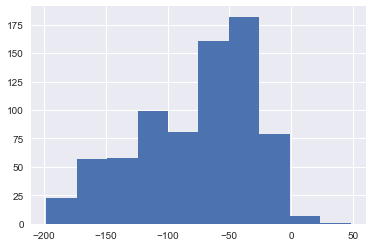

In [293]:
studentsForAAA.date_registration.hist()

In [294]:
testGroup = studentsForAAA[((studentsForAAA.date_registration >= -40) & (studentsForAAA.date_registration < 40))]

In [295]:
testGroup.final_result.describe()

count      193
unique       4
top       Pass
freq       113
Name: final_result, dtype: object

#### Passing rate for students who registered within -40 to +40 days from start of course

In [296]:
(113 + 0.0)/193

0.5854922279792746